In [1]:
import pandas as pd
import seaborn as sns

sns.set()

import matplotlib.pyplot as plt

from model.clustering import moving_norm 

In [2]:
df = pd.read_csv('../data/processed/data.csv', index_col=0)
cluster_info = pd.read_csv('../data/cluster_info/cluster_info_a_s.csv')
cluster_info['index'] = cluster_info['index'].apply(eval)

In [3]:
use_cols = []
for l in cluster_info['index']:
	use_cols += l

len(use_cols)

149

In [4]:
df = df[use_cols]
df

,9012,9256,9200,9272,9060,9377,9048,9333,9053,9045,...,9061,9271,9002,9269,9219,9242,9205,9241,9332,9257
2016-02-01,600,42100,271300,193600,69200,224900,18400,95800,184300,281000,...,123300,32700,140200,191500,588000,153000,167500,87300,52700,170800
2016-02-02,504000,405800,227900,179200,375400,277900,413600,152600,159500,221800,...,298500,53700,112500,23900,622500,153700,196400,60000,65700,256300
2016-02-03,467300,377800,136600,220300,231900,245100,336300,260400,154100,34800,...,266600,209700,151900,23700,796100,132500,263800,138700,68700,356500
2016-02-04,382200,325500,14300,130800,194300,311100,323900,340100,259800,12900,...,257100,432800,150300,193100,176800,117900,189600,64300,44300,332100
2016-02-05,298700,767800,487100,113700,194300,337900,229900,374200,288300,471700,...,255500,183500,298300,128400,189400,132300,248100,124800,98900,273200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-27,215100,41800,350400,200100,199300,103700,222500,78300,90800,127400,...,102200,133500,86500,139400,136300,87200,116900,136800,179500,137000
2018-01-28,187800,152200,320700,182800,123700,201000,222800,30200,76000,126800,...,123600,142800,89400,138000,171800,98300,215100,106600,181200,71200
2018-01-29,163500,72800,298300,181600,382100,207300,52500,100100,168600,111000,...,126500,205700,55400,161300,206900,131400,220500,124700,92300,137800
2018-01-30,139000,167300,293500,197000,349200,84200,37900,107700,159300,209800,...,122800,215100,35300,78900,172300,100600,325600,136300,66500,91800


In [18]:
from model.outlier import label_outliers

outliers_coords = label_outliers(df, r=1.5, win_len=20)
len(outliers_coords.keys())

149

In [19]:
outliers_coords['9012']

['2016-02-01',
 '2016-02-06',
 '2016-02-15',
 '2016-03-12',
 '2016-03-18',
 '2016-03-22',
 '2016-04-21',
 '2016-04-30',
 '2016-05-20',
 '2016-06-09',
 '2016-07-04',
 '2016-07-05',
 '2016-08-08',
 '2016-09-17',
 '2016-10-08',
 '2016-11-02',
 '2016-12-01',
 '2016-12-07',
 '2016-12-15',
 '2017-01-15',
 '2017-01-26',
 '2017-01-31',
 '2017-02-14',
 '2017-02-20',
 '2017-03-09',
 '2017-03-16',
 '2017-03-22',
 '2017-04-01',
 '2017-04-12',
 '2017-04-27',
 '2017-05-10',
 '2017-05-25',
 '2017-06-14',
 '2017-06-19',
 '2017-06-29',
 '2017-07-05',
 '2017-07-19',
 '2017-07-24',
 '2017-08-03',
 '2017-08-09',
 '2017-09-14',
 '2017-10-02',
 '2017-10-13',
 '2017-10-18',
 '2017-11-13',
 '2017-11-21',
 '2017-12-20',
 '2017-12-27',
 '2018-01-15']

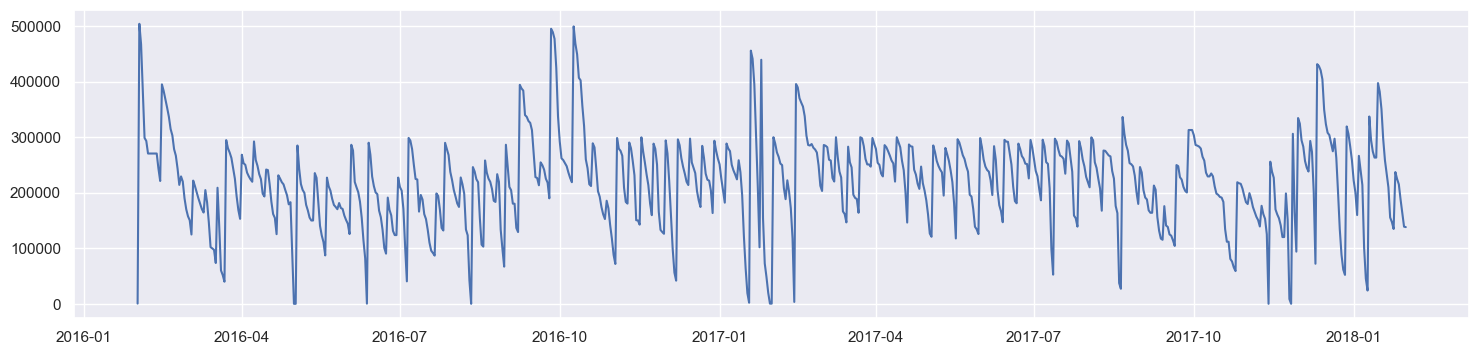

In [21]:
atm = '9012'

plt.figure(figsize=(18, 4))
plt.plot(pd.to_datetime(df.index), df[atm])
# plt.scatter(pd.to_datetime(outliers_coords[atm]), df[atm][outliers_coords[atm]], color='red')

In [17]:
anomaly_list = []
data_norm, _, _ = moving_norm(df, win_len=30, drop_na=True, anomaly_pos=anomaly_list, r=1.5)
data_norm

,9012,9256,9200,9272,9060,9377,9048,9333,9053,9045,...,9061,9271,9002,9269,9219,9242,9205,9241,9332,9257
2016-02-01,-2.923948,-1.34194,-0.884185,-0.628854,-0.631759,-0.909204,-2.195166,-1.112211,-0.310426,-0.019398,...,-1.309009,-1.392831,-1.861019,-0.15535,1.870171,-0.636698,-0.70493,-1.32636,-1.259315,0.022279
2016-02-02,2.307297,0.403783,-1.156751,-0.705815,1.493851,-0.17538,0.913145,-0.63803,-0.689666,-0.492633,...,2.156713,-1.148113,-2.474566,-1.734925,2.102433,-0.62621,-0.420954,-1.61329,-1.005171,1.40594
2016-02-03,1.925917,0.269386,-1.730144,-0.486155,0.497688,-0.62952,0.305168,0.261913,-0.772242,-1.987479,...,1.525682,0.669788,-1.601867,-1.73681,3.271149,-0.94386,0.241331,-0.786132,-0.946523,3.027494
2016-02-04,1.041573,0.018352,-2.498227,-0.964489,0.236673,0.284299,0.20764,0.927269,0.844114,-2.162544,...,1.337758,3.269619,-1.637307,-0.140271,-0.898125,-1.162619,-0.487772,-1.568096,-1.423531,2.632625
2016-02-05,0.173855,2.141347,0.471108,-1.055881,0.236673,0.655366,-0.531685,1.211944,1.279934,1.505025,...,1.306107,0.364474,1.640851,-0.750047,-0.813299,-0.946856,0.08706,-0.932225,-0.356127,1.679436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-27,0.97637,-1.821617,1.113223,0.813326,-0.488156,0.035682,0.42962,-0.468385,-0.870428,-0.988384,...,-0.755567,-0.3329,-0.570175,0.23862,-1.054049,-0.330182,-0.526667,0.109432,0.823454,1.20776
2018-01-28,0.266433,0.41833,0.873607,0.543022,-1.262427,1.482287,0.432982,-1.304493,-1.19944,-1.007391,...,-0.088423,-0.080636,-0.524737,0.214586,-0.507355,0.251567,0.165601,-0.903195,0.850751,-0.719437
2018-01-29,-0.365489,-1.192647,0.692886,0.524273,1.384024,1.575952,-1.475502,-0.089442,0.85911,-1.507919,...,0.001984,1.625538,-1.057451,0.614574,0.03318,1.986331,0.203668,-0.296289,-0.576753,1.231191
2018-01-30,-1.002612,0.7247,0.65416,0.76489,1.047073,-0.254234,-1.639118,0.042667,0.652366,1.621963,...,-0.113363,1.880515,-1.372379,-0.799977,-0.499655,0.372109,0.944578,0.092667,-0.991035,-0.11609


In [18]:
anomaly_values = [df.loc[pos] for pos in anomaly_list]
anomalies = pd.DataFrame(anomaly_list, columns=['date', 'atm'])
anomalies['values'] = anomaly_values
anomalies

,date,atm,values
0,2016-02-01,9012,600
1,2016-02-01,9048,18400
2,2016-02-01,9152,0
3,2016-02-01,9050,0
4,2016-02-01,9085,72100
...,...,...,...
12757,2018-01-31,9121,64800
12758,2018-01-31,9086,210400
12759,2018-01-31,9242,60000
12760,2018-01-31,9205,540800


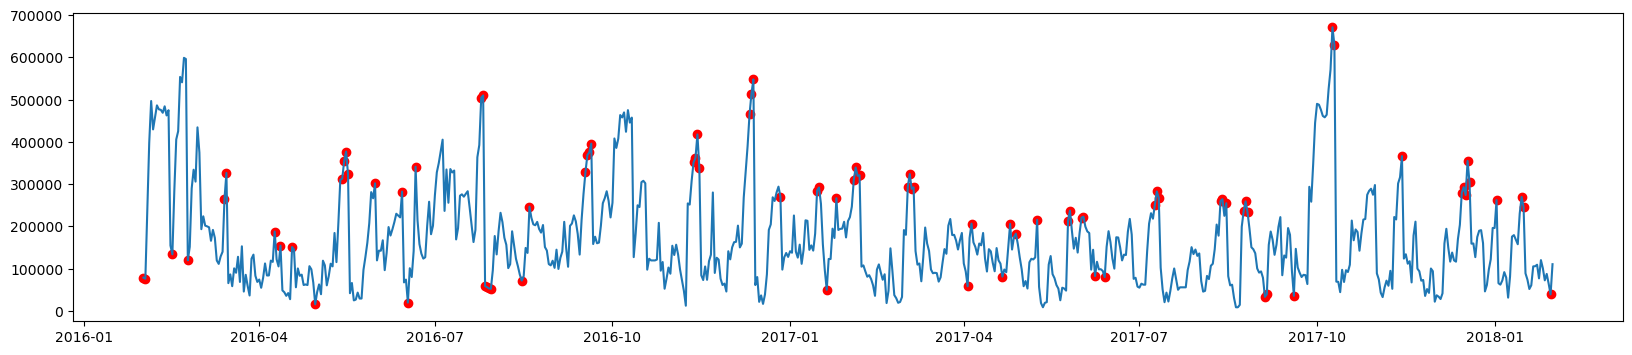

In [62]:
atm = '9089'
plt.figure(figsize=(20, 4))
plt.plot(pd.to_datetime(df[atm].index), df[atm])

a = data_norm[atm][abs(data_norm[atm]) > 1.5]
plt.scatter(a.index, df[atm][a.index], color='red')

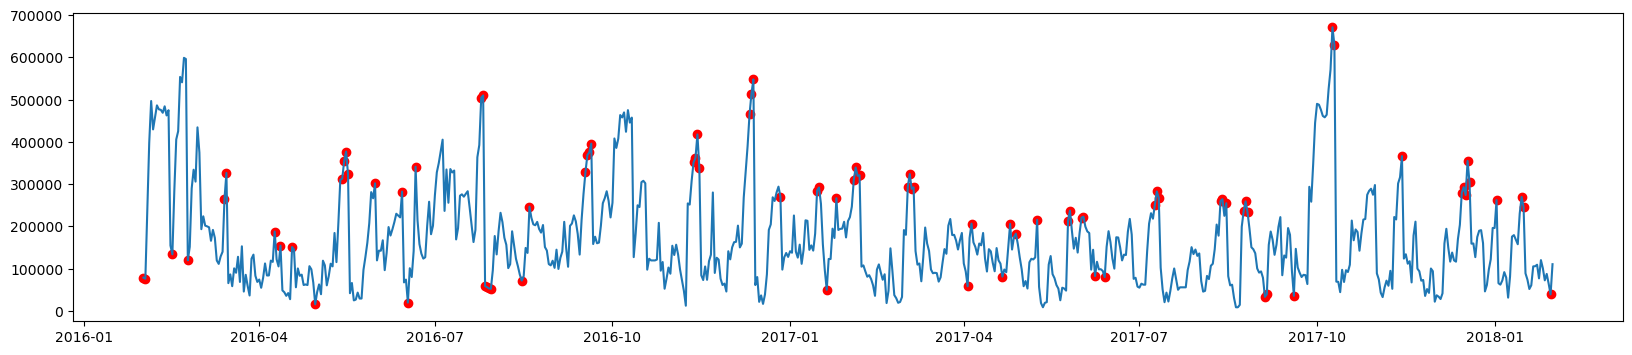

In [63]:
plt.figure(figsize=(20, 4))
plt.plot(pd.to_datetime(df[atm].index), df[atm])
plt.scatter(pd.to_datetime(anomalies[anomalies['atm'] == atm]['date']), anomalies[anomalies['atm'] == atm]['values'], color='red')

In [21]:
res = df.iloc[1:].to_numpy() - df.iloc[:-1].to_numpy()
res = pd.DataFrame(res, index=df.index[1:], columns=df.columns)
res

,9012,9256,9200,9272,9060,9377,9048,9333,9053,9045,...,9061,9271,9002,9269,9219,9242,9205,9241,9332,9257
2016-02-02,503400,363700,-43400,-14400,306200,53000,395200,56800,-24800,-59200,...,175200,21000,-27700,-167600,34500,700,28900,-27300,13000,85500
2016-02-03,-36700,-28000,-91300,41100,-143500,-32800,-77300,107800,-5400,-187000,...,-31900,156000,39400,-200,173600,-21200,67400,78700,3000,100200
2016-02-04,-85100,-52300,-122300,-89500,-37600,66000,-12400,79700,105700,-21900,...,-9500,223100,-1600,169400,-619300,-14600,-74200,-74400,-24400,-24400
2016-02-05,-83500,442300,472800,-17100,0,26800,-94000,34100,28500,458800,...,-1600,-249300,148000,-64700,12600,14400,58500,60500,54600,-58900
2016-02-06,-5500,-191800,-55200,63800,-34400,-48300,239900,-253400,-5900,-54900,...,-36400,39500,-16200,22600,147600,-60000,-23200,28300,95100,-54900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-27,-9700,-61200,11500,105500,-37400,6700,-12700,-31800,-38800,-6800,...,13700,13500,-13800,2100,300,-8800,-13800,-8400,-37800,1100
2018-01-28,-27300,110400,-29700,-17300,-75600,97300,300,-48100,-14800,-600,...,21400,9300,2900,-1400,35500,11100,98200,-30200,1700,-65800
2018-01-29,-24300,-79400,-22400,-1200,258400,6300,-170300,69900,92600,-15800,...,2900,62900,-34000,23300,35100,33100,5400,18100,-88900,66600
2018-01-30,-24500,94500,-4800,15400,-32900,-123100,-14600,7600,-9300,98800,...,-3700,9400,-20100,-82400,-34600,-30800,105100,11600,-25800,-46000


In [22]:
res_norm = moving_norm(res)[0]
res_norm

,9012,9256,9200,9272,9060,9377,9048,9333,9053,9045,...,9061,9271,9002,9269,9219,9242,9205,9241,9332,9257
2016-02-02,3.899737,2.037768,-0.504784,-0.142597,2.850333,0.799581,2.674973,0.40439,-0.782927,-0.458654,...,3.8254,0.19281,-0.79921,-2.509869,0.328594,-0.061014,0.159212,-0.416578,0.251463,1.86447
2016-02-03,-0.414002,-0.155042,-0.907234,0.162262,-1.348625,-0.745903,-0.64804,1.002878,-0.147546,-1.539732,...,-0.701429,1.744024,0.815089,-0.19931,1.174246,-0.496261,0.527138,0.801553,-0.035268,2.179809
2016-02-04,-0.80057,-0.291078,-1.167692,-0.555119,-0.359811,1.033745,-0.19161,0.673123,3.491155,-0.143129,...,-0.211806,2.515035,-0.171294,2.141615,-3.646149,-0.365091,-0.826067,-0.957842,-0.820912,-0.493066
2016-02-05,-0.787791,2.477786,3.83226,-0.157428,-0.00873,0.32765,-0.765489,0.138004,0.962733,3.923179,...,-0.039126,-2.913065,3.427799,-1.089579,0.195454,0.211264,0.442085,0.592402,1.444266,-1.233148
2016-02-06,-0.16481,-1.072025,-0.603926,0.286953,-0.329931,-1.025099,1.582774,-3.235826,-0.163922,-0.42228,...,-0.799791,0.405384,-0.522542,0.11539,1.01618,-1.267384,-0.338684,0.222366,2.605529,-1.147341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-27,-0.061871,-0.816724,-0.085438,1.981098,-0.438418,0.13899,-0.08063,-0.193857,-0.890533,-0.128545,...,0.319368,0.277992,0.055455,0.326148,0.075515,-0.158623,-0.725991,0.088985,-0.6588,0.047881
2018-01-28,-0.4889,1.671731,-0.560475,-0.743494,-0.748444,1.390726,0.088433,-0.400249,-0.468813,0.013773,...,0.504126,0.135606,0.645322,0.27482,0.552738,0.594741,0.47559,-0.59648,0.15798,-1.321024
2018-01-29,-0.416111,-1.080651,-0.476306,-0.38628,1.96225,0.133463,-2.130203,1.09388,1.418387,-0.335134,...,0.060226,1.952726,-0.658038,0.637044,0.547315,1.427605,-0.520006,0.922233,-1.715444,1.388139
2018-01-30,-0.420964,1.441158,-0.273377,-0.017972,-0.401897,-1.654336,-0.10534,0.30503,-0.372168,2.295438,...,-0.098138,0.138996,-0.16707,-0.913037,-0.397641,-0.991487,0.549616,0.717851,-0.410664,-0.915877


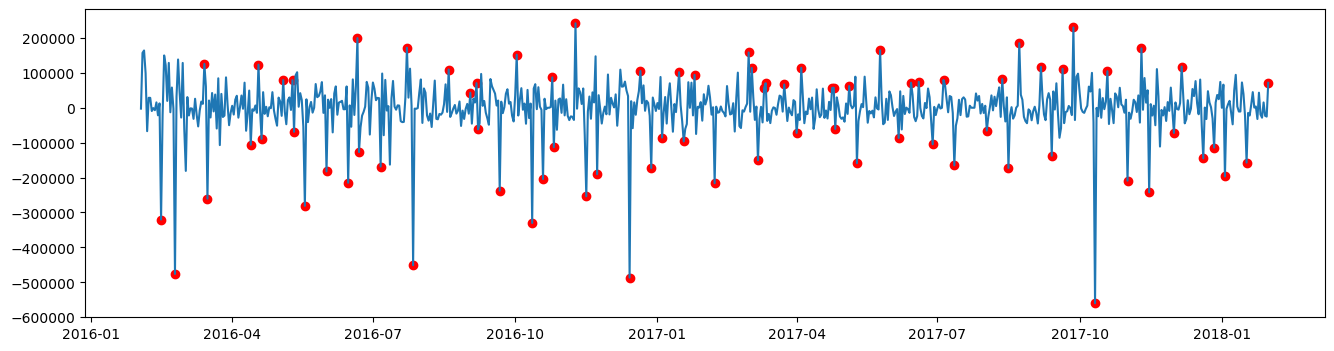

In [64]:
plt.figure(figsize=(16, 4))
plt.plot(pd.to_datetime(res[atm].index), res[atm])

a_res = res_norm[atm][abs(res_norm[atm]) > 1.5]
plt.scatter(a_res.index, res[atm][a_res.index], color='red')

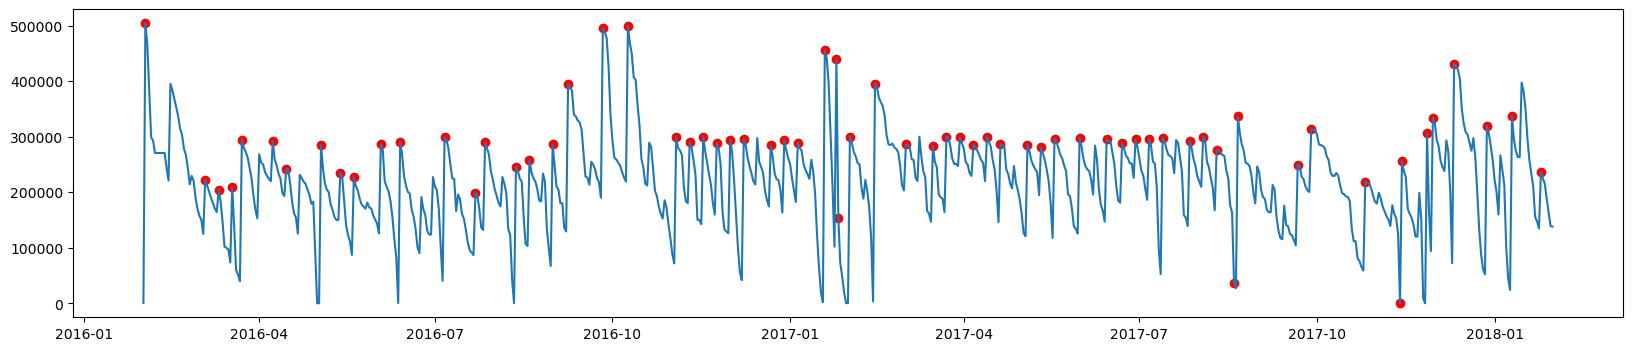

In [24]:
plt.figure(figsize=(20, 4))
plt.plot(pd.to_datetime(df[atm].index), df[atm])
plt.scatter(a_res.index, df[atm][a_res.index], color='red')

<Axes: >

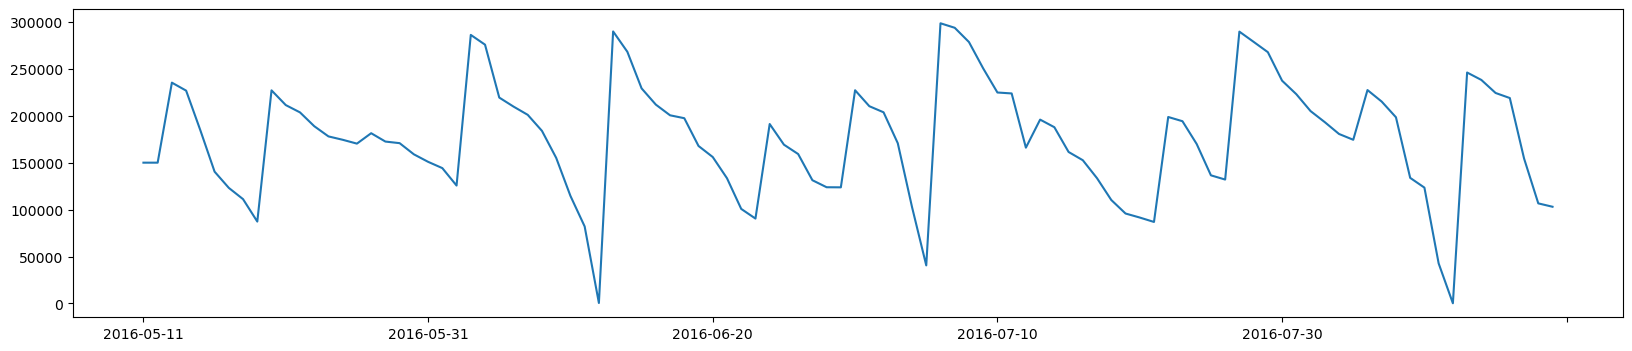

In [25]:
df[atm].iloc[100:200].plot(figsize=(20, 4))

In [26]:
res_norm[res_norm > 10].isna().sum()

9012    730
9256    730
9200    730
9272    730
9060    730
       ... 
9242    730
9205    730
9241    730
9332    730
9257    730
Length: 149, dtype: int64

In [27]:
res_norm[res_norm > 1]

,9012,9256,9200,9272,9060,9377,9048,9333,9053,9045,...,9061,9271,9002,9269,9219,9242,9205,9241,9332,9257
2016-02-02,3.899737,2.037768,NaN,NaN,2.850333,NaN,2.674973,NaN,NaN,NaN,...,3.8254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.86447
2016-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.002878,NaN,NaN,...,NaN,1.744024,NaN,NaN,1.174246,NaN,NaN,NaN,NaN,2.179809
2016-02-04,NaN,NaN,NaN,NaN,NaN,1.033745,NaN,NaN,3.491155,NaN,...,NaN,2.515035,NaN,2.141615,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-05,NaN,2.477786,3.83226,NaN,NaN,NaN,NaN,NaN,NaN,3.923179,...,NaN,NaN,3.427799,NaN,NaN,NaN,NaN,NaN,1.444266,NaN
2016-02-06,NaN,NaN,NaN,NaN,NaN,NaN,1.582774,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.01618,NaN,NaN,NaN,2.605529,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-27,NaN,NaN,NaN,1.981098,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-28,NaN,1.671731,NaN,NaN,NaN,1.390726,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-29,NaN,NaN,NaN,NaN,1.96225,NaN,NaN,1.09388,1.418387,NaN,...,NaN,1.952726,NaN,NaN,NaN,1.427605,NaN,NaN,NaN,1.388139
2018-01-30,NaN,1.441158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.295438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
res[atm].idxmax(), res[atm].argmax()

('2016-02-02', 0)

In [51]:
res_outlier_coords = label_outliers(res, r=2, win_len=20)

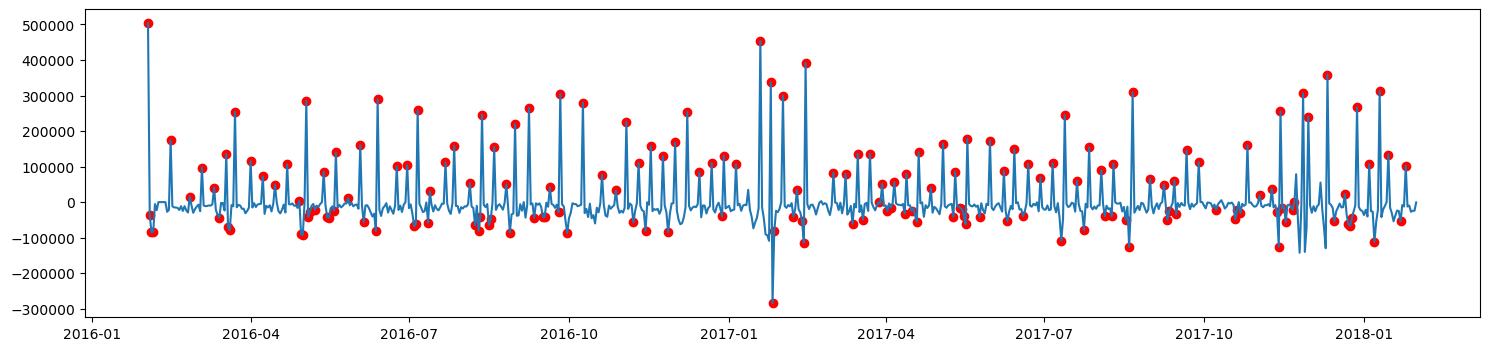

In [52]:
plt.figure(figsize=(18, 4))
plt.plot(pd.to_datetime(res[atm].index), res[atm])
plt.scatter(pd.to_datetime(res_outlier_coords[atm]), res[atm][res_outlier_coords[atm]], color='red')

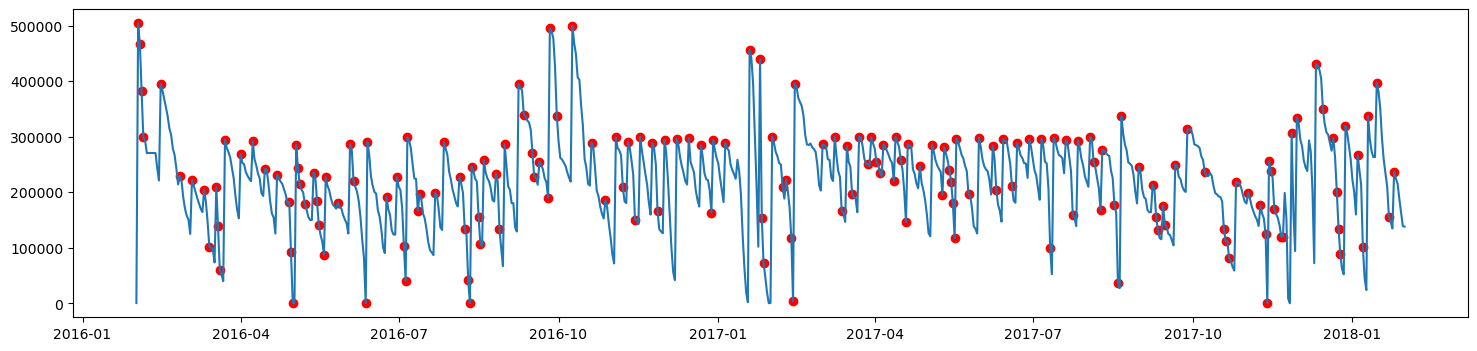

In [55]:
plt.figure(figsize=(18, 4))
plt.plot(pd.to_datetime(df[atm].index), df[atm])
plt.scatter(pd.to_datetime(res_outlier_coords[atm]), df[atm][res_outlier_coords[atm]], color='red')

In [47]:
res[atm][res_outlier_coords[atm]]

2016-02-02    503400
2016-02-15    173800
2016-02-04    -85100
2016-02-05    -83500
2016-02-03    -36700
               ...  
2018-01-28    -27300
2018-01-30    -24500
2018-01-29    -24300
2018-01-23     -8300
2018-01-27     -9700
Name: 9012, Length: 650, dtype: int64

In [42]:
res_outlier_coords[atm]

['2016-02-02',
 '2016-02-15',
 '2016-02-04',
 '2016-02-05',
 '2016-02-03',
 '2016-02-13',
 '2016-02-07',
 '2016-02-14',
 '2016-02-20',
 '2016-02-19',
 '2016-02-18',
 '2016-02-17',
 '2016-02-16',
 '2016-02-21',
 '2016-02-06',
 '2016-03-04',
 '2016-03-11',
 '2016-02-26',
 '2016-02-28',
 '2016-02-25',
 '2016-03-03',
 '2016-02-22',
 '2016-02-24',
 '2016-03-12',
 '2016-02-29',
 '2016-03-10',
 '2016-03-02',
 '2016-03-01',
 '2016-02-23',
 '2016-03-06',
 '2016-03-07',
 '2016-02-27',
 '2016-03-08',
 '2016-03-23',
 '2016-03-18',
 '2016-04-01',
 '2016-03-20',
 '2016-03-19',
 '2016-03-14',
 '2016-03-13',
 '2016-03-29',
 '2016-03-30',
 '2016-03-17',
 '2016-03-15',
 '2016-03-16',
 '2016-03-27',
 '2016-03-28',
 '2016-03-31',
 '2016-03-24',
 '2016-03-22',
 '2016-03-26',
 '2016-04-08',
 '2016-04-15',
 '2016-04-09',
 '2016-04-18',
 '2016-04-21',
 '2016-04-13',
 '2016-04-17',
 '2016-04-19',
 '2016-04-02',
 '2016-04-11',
 '2016-04-04',
 '2016-04-10',
 '2016-04-16',
 '2016-04-12',
 '2016-04-03',
 '2016-04-

In [44]:
res[atm]['2018-01-20']

-24000